<a href="https://colab.research.google.com/github/leejunghyunA/-_study/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

## STEP1. 데이터 만들기

In [ ]:
# case 1
N=20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
class1_data=torch.hstack([random0,random5])
class2_data=torch.hstack([random5,random0])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

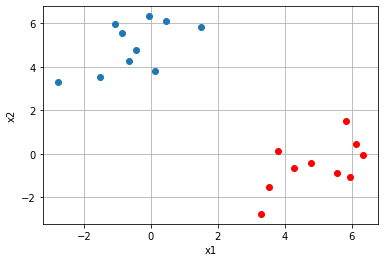

In [ ]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [ ]:
print(X.shape)
print(y.shape)

torch.Size([20, 2])
torch.Size([20, 1])


## STEP2. 모델 만들기

In [ ]:
from torch import nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()

    # case 1, plain
    self.linear = nn.Sequential(nn.Linear(2,100),
                                nn.Sigmoid(),
                                nn.Linear(100,1),
                                nn.Sigmoid())
    
    # case 1, very simple
    self.linear = nn.Sequential(nn.Linear(2,1),
                                nn.Sigmoid())
    
     # case 1, deep (SGD사용 시 평면으로 나오면서 모델이 학습을 제대로 못함 _ 복잡해져서서)
    self.linear = nn.Sequential(nn.Linear(2,100),
                                nn.Sigmoid(),
                                nn.Linear(100,100),
                                nn.Sigmoid(),
                                nn.Linear(100, 100),
                                nn.Sigmoid(),
                                nn.Linear(100, 1),
                                nn.Sigmoid()) 
    
  def forward(self,x):
    x = self.linear(x)
    return x

In [ ]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 2개 값으로 이루어진 좌표값 (x1,x2) 데이터 5개를 입력함

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Sigmoid()
    (6): Linear(in_features=100, out_features=1, bias=True)
    (7): Sigmoid()
  )
)
torch.Size([5, 1])


## STEP3. 모델 학습시키기

In [ ]:
from torch import optim
import torch.nn.functional as F

LR = 1e-1 #(1/10)
EPOCH = 100

# optimizer = optim.SGD(model.parameters(), lr = LR)
optimizer = optim.Adam(model.parameters(), lr = LR) # case1, deep 

# loss값 출력
loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH):
  # inference (모델 통과)
  y_hat = model(X)
  # loss
  loss = F.binary_cross_entropy(y_hat, y)  

  # update
  optimizer.zero_grad() # gradient 누적을 막기위한 초기화
  loss.backward() # backpropagation (weight에 대한 미분해서 gradiant를구해줌)

  optimizer.step() # weight update
  #-> weight = weight - alpha*weight.grad # 현재 weight에서 grad를 구하는 방법 -> optimizer로 다 실행해줌

  # print loss
  # print(loss.item()) # .item은 숫자만 출력해줌
  loss_history += [loss.item()]
  print(f"Epoch: {ep+1}, train loss: {round(loss.item(),3)}")
  print("-"*20)

Epoch: 1, train loss: 0.693
--------------------
Epoch: 2, train loss: 3.322
--------------------
Epoch: 3, train loss: 0.605
--------------------
Epoch: 4, train loss: 0.472
--------------------
Epoch: 5, train loss: 0.534
--------------------
Epoch: 6, train loss: 0.392
--------------------
Epoch: 7, train loss: 0.23
--------------------
Epoch: 8, train loss: 0.118
--------------------
Epoch: 9, train loss: 0.054
--------------------
Epoch: 10, train loss: 0.025
--------------------
Epoch: 11, train loss: 0.013
--------------------
Epoch: 12, train loss: 0.007
--------------------
Epoch: 13, train loss: 0.004
--------------------
Epoch: 14, train loss: 0.002
--------------------
Epoch: 15, train loss: 0.001
--------------------
Epoch: 16, train loss: 0.001
--------------------
Epoch: 17, train loss: 0.001
--------------------
Epoch: 18, train loss: 0.0
--------------------
Epoch: 19, train loss: 0.0
--------------------
Epoch: 20, train loss: 0.0
--------------------
Epoch: 21, train

In [ ]:
# x= torch.tensor([1.],requires_grad=True)
# for _ in range(2):
#     loss=x**2
#     loss.backward() # 밑에 none없이 돌리면 x가 누적되서 출력됨 
#     print(x.grad)
#     # x.grad = None

In [ ]:
# binary_cross_entropy에서는 밑에 수식을 해준 후 표본의 개수를 나눠서 구해줌 (평균으로 나오게됨)
print(F.binary_cross_entropy(y_hat, y))
# 실제 binary 수식 
print(torch.sum(-torch.log(y_hat**y*(1-y_hat)**(1-y))))
# 실제 binary 수식 /N
print(torch.sum(-torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)

tensor(2.3723e-05, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0005, grad_fn=<SumBackward0>)
tensor(2.3723e-05, grad_fn=<DivBackward0>)


Text(0, 0.5, 'loss')

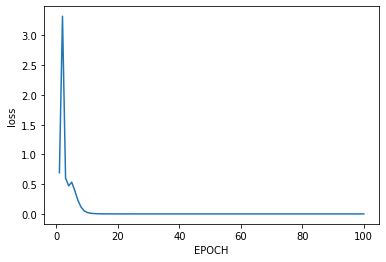

In [ ]:
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel("EPOCH")
plt.ylabel('loss')

## STEP4. 모델 테스트하기

False


Text(0.5, 0, 'x2')

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning:

The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



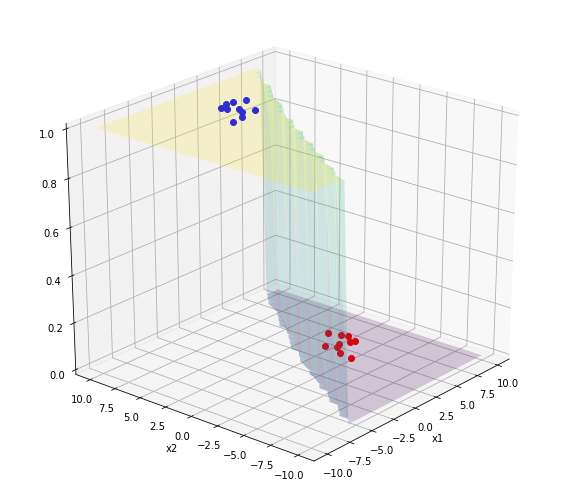

In [ ]:
x1_test = torch.linspace(-10, 10, 30)
x2_test = torch.linspace(-10, 10, 30)

X1_test, X2_test = torch.meshgrid(x1_test, x2_test)

X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2) # (30,30,1), (30,30,1)을 묶어서 (30,30,2)로 만듬
X_test.shape

model.eval() # test mode로 ## 1. 해결
with torch.no_grad(): # test에서 쓸데 없이 메모리 안 잡으려고 ## 2. 해결
  y_hat = model(X_test)
# 1. dropout 혹은 BN(batch normalize) 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다 
Y_hat = y_hat.squeeze()

print(model.training) # 여기까지만 하면 False로만 출력됨 
## 알고리즘 짤 때 필요하면
##if model.training == True:
## ~~
## else : 등을 추가해주면 됨
# model.train()
# print(model.training)

# 시각화
plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test,Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)

# CASE 2

In [ ]:
# case 2
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

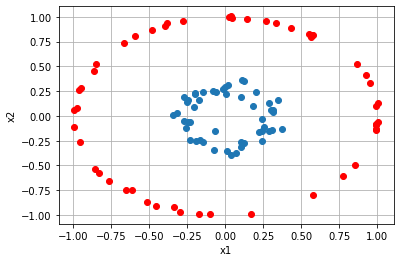

In [ ]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [ ]:
print(X.shape)
print(y.shape)

torch.Size([100, 2])
torch.Size([100, 1])


## STEP2. 모델 만들기

In [ ]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        # case 2, plain (갯수를 많이 해주면 무한대로 가버려서 출력값이 잘안나옴)
        self.linear = nn.Sequential(nn.Linear(2,1000),
                                    nn.Sigmoid(),
                                    nn.Linear(1000,1),
                                    nn.Sigmoid())
        
        # case 2, very simple 과제 모델 성능 개선시키기 
        ## -> 파라미터를 변경해도 성능 개선이 안됨 => 왜냐면! 평면에서 0.5가 나오는 경우는 선일 수 밖에 없음 
        self.linear = nn.Sequential(nn.Linear(2,1),
                            nn.Sigmoid()) 
        
        # case 2, deep
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())
        
        # case 2, very deep
        ## -> vanishing gradient 발생! (랠루로 해결)
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    *[j for _ in range(10) for j in [nn.Linear(100,100), nn.Sigmoid()]],
                                    nn.Linear(100,1),
                                    nn.Sigmoid())
        
        # case 2, very deep relu
        ## -> 마지막도 ReLU로 하면 0-1 사이 이외의 값을 뱉을 수 있어서 복소수의 값을 배출할 수 있기 때문에 오류발생!!
        ## => 마지막은 Sigmoid로 변경해줘야함
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.ReLU(),
                                    *[j for _ in range(10) for j in [nn.Linear(100,100), nn.ReLU()]],
                                    nn.Linear(100,1),
                                    nn.Sigmoid())
        
    def forward(self, x):
        x = self.linear(x)
        return x

In [ ]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 2개 값으로 이루어진 좌표값 (x1,x2) 데이터 5개를 입력함

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=100, bias=True)
    (11): ReLU()
    (12): Linear(in_features=100, out_features=100, bias=True)
    (13): ReLU()
    (14): Linear(in_features=100, out_features=100, bias=True)
    (15): ReLU()
    (16): Linear(in_features=100, out_features=100, bias=True)
    (17): ReLU()
    (18): Linear(in_features=100, out_features=100, bias=True)
    (19): ReLU()
    (20): Linear(in_features=100, out_features=100, bias=True)
    (21): ReLU()
    (22): Linear(in_features=100, out_features=1, bias=True)
    (23): Sigmoid()
  )
)
torch.Size([5, 1

In [ ]:
# 1번째 방법
nn.Sequential(*[nn.Sequential(nn.Linear(100,100), nn.Sigmoid()) for _ in range(10)])
# nn 시퀀셜 안에는 리스트가 들어갈 수 없다.(unzip사용)
# ex.)nn.Sequential(*[])
# (*[1,2,3]) -> (1,2,3) => 안에 괄호를 없애줌

# 2번째 방법
nn.Sequential(*[nn.Linear(100,100) if i % 2 ==0 else nn.Sigmoid() for i in range(20)])

# 3번째 방법
nn.Sequential(*[j for _ in range(10) for j in [nn.Linear(100,100), nn.Sigmoid()]])

Sequential(
  (0): Linear(in_features=100, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=100, out_features=100, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=100, out_features=100, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=100, out_features=100, bias=True)
  (13): Sigmoid()
  (14): Linear(in_features=100, out_features=100, bias=True)
  (15): Sigmoid()
  (16): Linear(in_features=100, out_features=100, bias=True)
  (17): Sigmoid()
  (18): Linear(in_features=100, out_features=100, bias=True)
  (19): Sigmoid()
)

## STEP3. 모델 학습시키기

In [ ]:
from torch import optim
import torch.nn.functional as F

# LR = 1e-1 
# LR = 1e-2 # case 2, plain 에서 노드 천 개
LR = 1e-4
EPOCH = 500
# EPOCH = 500 # case2, plain 에서 노드 천 개

# optimizer = optim.SGD(model.parameters(), lr = LR)
optimizer = optim.Adam(model.parameters(), lr = LR) # case1, deep 

# loss값 출력
loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH):
  # inference (모델 통과)
  y_hat = model(X)
  # loss
  loss = F.binary_cross_entropy(y_hat, y)  

  # update
  optimizer.zero_grad() # gradient 누적을 막기위한 초기화
  loss.backward() # backpropagation (weight에 대한 미분해서 gradiant를구해줌)

  optimizer.step() # weight update
  #-> weight = weight - alpha*weight.grad # 현재 weight에서 grad를 구하는 방법 -> optimizer로 다 실행해줌

  # print loss
  # print(loss.item()) # .item은 숫자만 출력해줌
  loss_history += [loss.item()]
  print(f"Epoch: {ep+1}, train loss: {round(loss.item(),3)}")
  print("-"*20)

Epoch: 1, train loss: 0.693
--------------------
Epoch: 2, train loss: 0.693
--------------------
Epoch: 3, train loss: 0.693
--------------------
Epoch: 4, train loss: 0.693
--------------------
Epoch: 5, train loss: 0.693
--------------------
Epoch: 6, train loss: 0.693
--------------------
Epoch: 7, train loss: 0.693
--------------------
Epoch: 8, train loss: 0.693
--------------------
Epoch: 9, train loss: 0.693
--------------------
Epoch: 10, train loss: 0.693
--------------------
Epoch: 11, train loss: 0.693
--------------------
Epoch: 12, train loss: 0.693
--------------------
Epoch: 13, train loss: 0.693
--------------------
Epoch: 14, train loss: 0.693
--------------------
Epoch: 15, train loss: 0.693
--------------------
Epoch: 16, train loss: 0.693
--------------------
Epoch: 17, train loss: 0.693
--------------------
Epoch: 18, train loss: 0.693
--------------------
Epoch: 19, train loss: 0.693
--------------------
Epoch: 20, train loss: 0.693
--------------------
Epoch: 21

In [ ]:
# x= torch.tensor([1.],requires_grad=True)
# for _ in range(2):
#     loss=x**2
#     loss.backward() # 밑에 none없이 돌리면 x가누적되서 출력됨 
#     print(x.grad)
#     # x.grad = None

In [ ]:
# binary_cross_entropy에서는 밑에 수식을 해준 후 표본의 개수를 나눠서 구해줌 (평균으로 나오게됨)
print(F.binary_cross_entropy(y_hat, y)) #y_hat: 머신의 예측, y : 레이블블
# 실제 binary 수식 
print(torch.sum(-torch.log(y_hat**y*(1-y_hat)**(1-y))))
# 실제 binary 수식 /N
print(torch.sum(-torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)

tensor(5.2298e-06, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0005, grad_fn=<SumBackward0>)
tensor(5.2298e-06, grad_fn=<DivBackward0>)


Text(0, 0.5, 'loss')

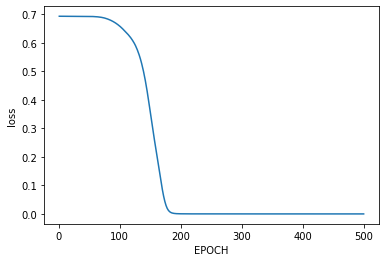

In [ ]:
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel("EPOCH")
plt.ylabel('loss')

## STEP4. 모델 테스트하기

False


Text(0.5, 0, 'x2')

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning:

The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



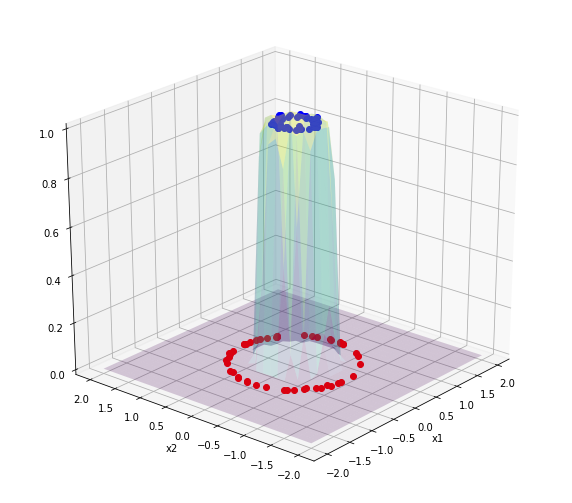

In [ ]:
x1_test = torch.linspace(-2, 2, 30)
x2_test = torch.linspace(-2, 2, 30)

X1_test, X2_test = torch.meshgrid(x1_test, x2_test)

X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2) # (30,30,1), (30,30,1)을 묶어서 (30,30,2)로 만듬
X_test.shape

model.eval() # test mode로 ## 1. 해결
with torch.no_grad(): # test에서 쓸데 없이 메모리 안 잡으려고 ## 2. 해결
  y_hat = model(X_test)
# 1. dropout 혹은 BN(batch normalize) 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다 
Y_hat = y_hat.squeeze()

print(model.training) # 여기까지만 하면 False로만 출력됨 
## 알고리즘 짤 때 필요하면
##if model.training == True:
## ~~
## else : 등을 추가해주면 됨
# model.train()
# print(model.training)

# 시각화
plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test,Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)